In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [9]:
def f1(x):
    return float((3 * x + 4) ** 2)

def f2(x):
    return float ((x ** 6) + (x ** 5) - (x ** 4) + (x ** 3) - x)

In [10]:
def df1(x):
    return float(18 * x + 24)

def df2(x):
    return float ((6 * (x ** 5)) + (5 * (x ** 4)) - (4 * (x ** 3)) + (3 * (x ** 2))- 1)

In [11]:
def gradient_descent(f, df, x0, step_size, max_iter):
    x = x0
    steps = 0
    while (abs(step_size * df(x)) > 0.000001) and steps <= max_iter: # loop until the function converges or maximum number of iterations is exceeded
        x = x - (step_size * df(x))
        steps += 1
    print(f"converged after {steps} steps")
    return x

In [12]:
gradient_descent(f1, df1, 8, 0.001, 1000)

converged after 663 steps


-1.333278385170145

In [13]:
def descent_animated(f, df, x0, step_size, max_iter, X, filename):
    """
    Plots a function and applies gradient descent, representing the current guess with a red line.
    Args:
        f : the function to apply gradient descent on
        df : the derivative of f
        x0 : starting guess for the gradient descent algo
        step_size : eta, controls how big the steps between guesses are
        max_iter : number of iterations after which the plotting is stopped, regardless of whether the algorithm has converged
        X : the range of x values for the function to be plotted over
        filename : the filename for the output file (gif)
    """
    images = []
    steps = 0
    x = x0
    y = [f(x) for x in X]
    plt.plot(X, y)
    while (abs(step_size * df(x)) > 0.000001) and steps <= max_iter: # loop until the function converges or maximum number of iterations is exceeded
        x = x - (step_size * df(x))
        line = plt.plot([x] * len(y), y, color = 'r', alpha = 0.5, label = f"Current x value: {x}")
        text = plt.text(min(X), max(y), f"Current value of x:{x}\nStep no: {steps}")
        steps += 1
        plt.savefig("out.png")
        images.append(imageio.imread("out.png"))
        line.pop(0).remove()
        text.remove()
    imageio.mimsave(filename + ".gif", images)
    plt.clf()
descent_animated(f2, df2, 1, 0.1, 100, np.linspace(-2, 1.3), f"test")

#for step in [0.1, 0.01, 0.001, 0.0001]:
#    descent_animated(f2, df2, 1, step, 100, np.linspace(-2, 1.3), f"f2_eta={step}")
#    descent_animated(f2, df2, -1, step, 100, np.linspace(-2, 1.3), f"f2_1_eta={step}")

<Figure size 432x288 with 0 Axes>

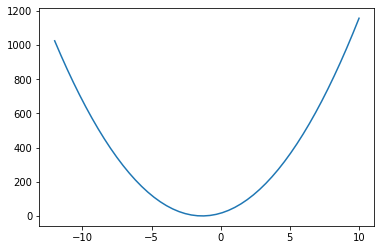

In [15]:
X = np.linspace(-12, 10)
y = [f1(x) for x in X]
plt.plot(X, y)

## The function $(3x + 4) ^ 2$ is convex, meaning that there exists a step size at which the gradient descent will converge to within a certain range of the minimum